In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
import statsmodels.api as sm 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

### Problem 01 - Fraud Check
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#### A. Import Data

In [12]:
data_1 = pd.read_csv('Fraud_check.csv')
data_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


#### B. Data Understanding

In [7]:
data_1.shape

(600, 6)

In [8]:
data_1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
data_1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [10]:
data_1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


#### C. Data Prepation

In [13]:
data_1["Taxable Income"]="Risky"
data_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable Income
0,NO,Single,68833,50047,10,YES,Risky
1,YES,Divorced,33700,134075,18,YES,Risky
2,NO,Married,36925,160205,30,YES,Risky
3,YES,Single,50190,193264,15,YES,Risky
4,NO,Married,81002,27533,28,NO,Risky
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Risky
596,YES,Divorced,69967,55369,2,YES,Risky
597,NO,Divorced,47334,154058,0,YES,Risky
598,YES,Married,98592,180083,17,NO,Risky


In [14]:
data_1.loc[data_1["Taxable.Income"]>30000,"Taxable Income"]="Good"
data_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [21]:
data_1['Taxable Income'].value_counts()

Good     476
Risky    124
Name: Taxable Income, dtype: int64

In [22]:
data_1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [23]:
data_1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
Taxable Income     object
dtype: object

In [24]:
data_1.drop(["Taxable.Income"],axis=1,inplace=True)

In [25]:
data_1 = pd.get_dummies(data_1, columns = ['Undergrad','Marital.Status','Urban'])
data_1

,City.Population,Work.Experience,Taxable Income,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,Good,1,0,0,0,1,0,1
1,134075,18,Good,0,1,1,0,0,0,1
2,160205,30,Good,1,0,0,1,0,0,1
3,193264,15,Good,0,1,0,0,1,0,1
4,27533,28,Good,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,Good,0,1,1,0,0,0,1
596,55369,2,Good,0,1,1,0,0,0,1
597,154058,0,Good,1,0,1,0,0,0,1
598,180083,17,Good,0,1,0,1,0,1,0


In [26]:
X = data_1.drop(labels='Taxable Income',axis=1)
y = data_1[['Taxable Income']]

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=12,shuffle=True)

In [28]:
X_train.shape,y_train.shape

((480, 9), (480, 1))

In [29]:
X_train

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
281,167403,7,1,0,0,0,1,0,1
571,95421,7,1,0,0,0,1,0,1
543,130816,13,1,0,0,0,1,1,0
421,135185,13,0,1,0,0,1,1,0
85,125155,12,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
432,157217,11,1,0,0,1,0,0,1
259,197841,7,1,0,0,1,0,1,0
241,31377,18,0,1,0,0,1,0,1
253,77256,29,0,1,0,0,1,1,0


#### D,Model Building

In [30]:
dt_model_1 = DecisionTreeClassifier()

In [31]:
dt_model_1.fit(X_train,y_train)

DecisionTreeClassifier()

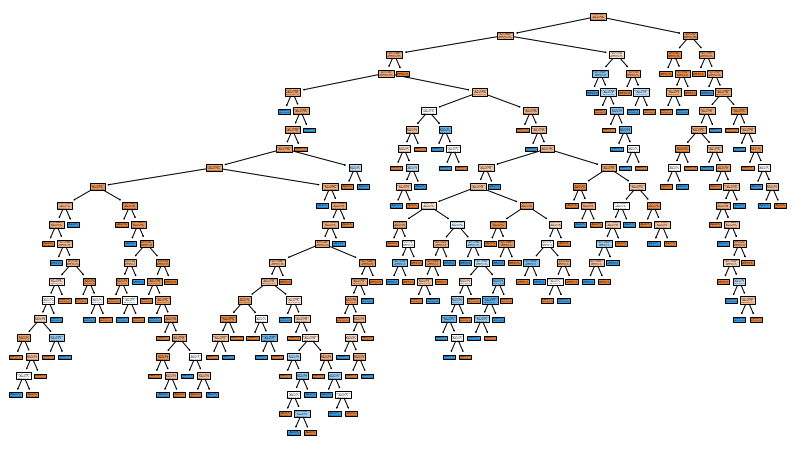

In [32]:
plt.figure(figsize=(14,8))
plot_tree(decision_tree = dt_model_1, filled=True)
plt.show()

In [33]:
y_train_pred = dt_model_1.predict(X_train)

In [34]:
print(accuracy_score(y_train,y_train_pred))

1.0


In [35]:
print('Classification Report:\n',classification_report(y_train,y_train_pred))

Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       369
       Risky       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [36]:
print('Confusion Matrix:\n',confusion_matrix(y_train,y_train_pred))

Confusion Matrix:
 [[369   0]
 [  0 111]]


In [37]:
y_test_pred = dt_model_1.predict(X_test)

In [38]:
print(accuracy_score(y_test,y_test_pred))

0.65


In [39]:
print('Classification Report:\n',classification_report(y_test,y_test_pred))

Classification Report:
               precision    recall  f1-score   support

        Good       0.87      0.71      0.78       107
       Risky       0.06      0.15      0.09        13

    accuracy                           0.65       120
   macro avg       0.47      0.43      0.44       120
weighted avg       0.79      0.65      0.71       120



In [40]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred))

Confusion Matrix:
 [[76 31]
 [11  2]]


#### from above we can observe that training accuracy is 100% while test accuracy is 65 %. 
#### Model is clearly overfitted we can tackle this over fitting problem by using GridSearchCV.

In [65]:
grid_search = GridSearchCV(estimator = dt_model_1,
                           param_grid = {'criterion':['entropy','gini'],
                                         'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]},
                           cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 2}
0.7666666666666666


In [66]:
dt_model_2 = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [67]:
dt_model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

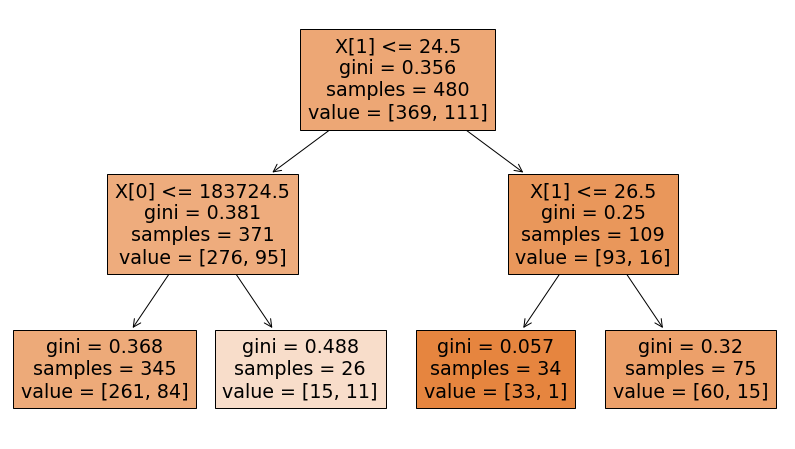

In [68]:
plt.figure(figsize=(14,8))
plot_tree(decision_tree = dt_model_2, filled=True)
plt.show()

In [69]:
y_train_pred_2 = dt_model_2.predict(X_train)

In [70]:
print(accuracy_score(y_train,y_train_pred_2))

print('Classification Report:\n',classification_report(y_train,y_train_pred_2))

print('Confusion Matrix:\n',confusion_matrix(y_train,y_train_pred_2))

0.76875
Classification Report:
               precision    recall  f1-score   support

        Good       0.77      1.00      0.87       369
       Risky       0.00      0.00      0.00       111

    accuracy                           0.77       480
   macro avg       0.38      0.50      0.43       480
weighted avg       0.59      0.77      0.67       480

Confusion Matrix:
 [[369   0]
 [111   0]]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
y_test_pred_2 = dt_model_2.predict(X_test)

In [72]:
print(accuracy_score(y_test,y_test_pred_2))

0.8916666666666667


In [73]:
print('Classification Report:\n',classification_report(y_test,y_test_pred_2))

Classification Report:
               precision    recall  f1-score   support

        Good       0.89      1.00      0.94       107
       Risky       0.00      0.00      0.00        13

    accuracy                           0.89       120
   macro avg       0.45      0.50      0.47       120
weighted avg       0.80      0.89      0.84       120



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred_2))

Confusion Matrix:
 [[107   0]
 [ 13   0]]


#### E. Output Interpretetion

#####  From dt_model_1 (original Model) -
 Hyperparameters - Criteria = gini and max depth = 22
 we can observe that the Training accuracy is 100% while testing accuracy is 65%.
 Less Bias and more Variance, Which states model is overfitted.
 
##### To overcome the overfitting we can use prooning techinique and Grid Search Cv to avoing complete growth of the DecCriteria ision Tree.
##### From dt_model_2 (Model after Gred Search CV optimization)
 Criteria = gini and max depth = 2
 we can observe that the Training accuracy is 76.8% while testing accuracy is 89%.
 Overfitting problem is overcame, But major problem with model is all prediction are showing risky.one sided predictionare not good.
